<h3> Garbage Bin Collection Project </h3>
<p> For this project I decided to use the public data of the location of garbage pickup sites across the 25 wards in Toronto as posted on the Open Data webpage on the City of Toronto Website, https://open.toronto.ca/dataset/litter-bin-collection-frequency/

I then cleaned the data by removing any pickup sites that had no Ward number and filtered the dataframe to only include the sites that are Existing. </p>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(r"C:\Projects\Datasets\Toronto Litter Bin Collection Frequency.csv")
df.head()

,_id,LOC ID,BIN ID,ADDRESS NUM,ADDRESS ST,FRONTING ST,SIDE,FROM ST,DIRECTION,SITE ID,WARD,BIA,ASSET TYPE,STATUS,BARCODE,SDE STATUS,DAYS SERVICED,geometry
0,1,1,LR-07817,532,Annette St,Annette St,North,Runnymede Rd,West,00954,04,,WR1,Existing,L1300954,0,5,"{'type': 'MultiPoint', 'coordinates': [[-79.48..."
1,2,2,LR-07821,2394,Bloor St W,Bloor St W,North,Armadale Ave,East,03373,04,Bloor West Village,WR4,Existing,L1303373,0,7,"{'type': 'MultiPoint', 'coordinates': [[-79.48..."
2,3,3,LR-07822,1873,Bloor St W,Bloor St W,South,Colborne Lodge Dr,East,00977,04,,WR2,Existing,L1300977,0,7,"{'type': 'MultiPoint', 'coordinates': [[-79.46..."
3,4,4,LR-07835,2190C,Bloor St W,Bloor St W,North,Kennedy Ave,East,03301,04,Bloor West Village,WR4,Existing,L1303301,0,7,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."
4,5,5,LR-07838,6,Oakmount Rd,Bloor St W,North,Oakmount Rd,West,00975,04,,WR1,Temporarily Removed,L1300975,0,7,"{'type': 'MultiPoint', 'coordinates': [[-79.46..."


In [3]:
#Use the info method to determine the total number of entries
df.info() #We can see we have 10469 pickup sites in the city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            10469 non-null  int64 
 1   LOC ID         10469 non-null  int64 
 2   BIN ID         10469 non-null  object
 3   ADDRESS NUM    10469 non-null  object
 4   ADDRESS ST     10469 non-null  object
 5   FRONTING ST    10469 non-null  object
 6   SIDE           10469 non-null  object
 7   FROM ST        10469 non-null  object
 8   DIRECTION      10469 non-null  object
 9   SITE ID        10469 non-null  object
 10  WARD           10469 non-null  object
 11  BIA            10469 non-null  object
 12  ASSET TYPE     10469 non-null  object
 13  STATUS         10469 non-null  object
 14  BARCODE        10469 non-null  object
 15  SDE STATUS     10469 non-null  int64 
 16  DAYS SERVICED  10469 non-null  int64 
 17  geometry       10469 non-null  object
dtypes: int64(4), object(14)
me

In [56]:
#Drop the geometry column
df = df.drop(columns='geometry')

In [57]:
#Sort the WARD values by ascending order
df = df.sort_values(by=['WARD']) 
df

,_id,LOC ID,BIN ID,ADDRESS NUM,ADDRESS ST,FRONTING ST,SIDE,FROM ST,DIRECTION,SITE ID,WARD,BIA,ASSET TYPE,STATUS,BARCODE,SDE STATUS,DAYS SERVICED
5883,5884,5886,LR-18130,,Village Green Sq,Village Green Sq,West,Village Green Sq,North,16299,,,WR4,Existing,L2216299,0,3
9560,9561,9564,LR-11085,,,Humber College Blvd,South,Arboretum Blvd,West,1061,01,,WR2,Temporarily Removed,L0101061,0,5
8162,8163,8166,LR-15089,1,Convair Dr,Renforth Dr,East,Convair Dr,South,12184,01,,WR2,Existing,L0212184,0,5
1450,1451,1451,LR-14826,2773,Islington Ave,Islington Ave,East,Finch Ave W,South,11627,01,,WR1,Existing,L0111627,0,5
3975,3976,3977,LR-13361,610,Martin Grove Rd,Martin Grove Rd,West,Eglinton Ave W,North,09789,01,,WR2,Temporarily Removed,L0409789,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,5362,5363,LR-15437,60,Rangeley Dr,Morningview Trl,West,Rangeley Dr,North,12695,25,,WR4,Existing,L4212695,0,1
2747,2748,2749,LR-12332,275,Manse Rd,Manse Rd,East,Hainford St,South,T4462,25,,WR1,Existing,L4404462,0,1
9690,9691,9694,LR-06896,4391,Lawrence Ave E,Lawrence Ave E,South,Morning Dew Rd,West,06911,25,,WR2,Existing,L4406911,0,4
8376,8377,8380,LR-06894,4261,Lawrence Ave E,Lawrence Ave E,South,Homestead Rd,West,06909,25,,WR2,Existing,L4406909,0,4


In [58]:
#Select the rows where the status is EXISTING and the Ward does not have an null value
df = df[(df['STATUS'] == 'Existing') & (df['WARD'] != ' ')]
df

,_id,LOC ID,BIN ID,ADDRESS NUM,ADDRESS ST,FRONTING ST,SIDE,FROM ST,DIRECTION,SITE ID,WARD,BIA,ASSET TYPE,STATUS,BARCODE,SDE STATUS,DAYS SERVICED
8162,8163,8166,LR-15089,1,Convair Dr,Renforth Dr,East,Convair Dr,South,12184,01,,WR2,Existing,L0212184,0,5
1450,1451,1451,LR-14826,2773,Islington Ave,Islington Ave,East,Finch Ave W,South,11627,01,,WR1,Existing,L0111627,0,5
8141,8142,8145,LR-15212,1920,Albion Rd,Albion Rd,North,Humberline Dr,East,12349,01,,WR2,Existing,L0112349,0,3
585,586,586,LR-15155,91,Westmore Dr,Westmore Dr,East,Carrier Dr,South,12295,01,,WR2,Existing,L0112295,0,3
588,589,589,LR-15169,190,Carrier Dr,Carrier Dr,East,Dansk Crt,South,12303,01,,WR2,Existing,L0112303,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,5362,5363,LR-15437,60,Rangeley Dr,Morningview Trl,West,Rangeley Dr,North,12695,25,,WR4,Existing,L4212695,0,1
2747,2748,2749,LR-12332,275,Manse Rd,Manse Rd,East,Hainford St,South,T4462,25,,WR1,Existing,L4404462,0,1
9690,9691,9694,LR-06896,4391,Lawrence Ave E,Lawrence Ave E,South,Morning Dew Rd,West,06911,25,,WR2,Existing,L4406911,0,4
8376,8377,8380,LR-06894,4261,Lawrence Ave E,Lawrence Ave E,South,Homestead Rd,West,06909,25,,WR2,Existing,L4406909,0,4


In [7]:
df.info() #We can see that we have around 9356 existing pickup sites

<class 'pandas.core.frame.DataFrame'>
Index: 9356 entries, 8162 to 721
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            9356 non-null   int64 
 1   LOC ID         9356 non-null   int64 
 2   BIN ID         9356 non-null   object
 3   ADDRESS NUM    9356 non-null   object
 4   ADDRESS ST     9356 non-null   object
 5   FRONTING ST    9356 non-null   object
 6   SIDE           9356 non-null   object
 7   FROM ST        9356 non-null   object
 8   DIRECTION      9356 non-null   object
 9   SITE ID        9356 non-null   object
 10  WARD           9356 non-null   object
 11  BIA            9356 non-null   object
 12  ASSET TYPE     9356 non-null   object
 13  STATUS         9356 non-null   object
 14  BARCODE        9356 non-null   object
 15  SDE STATUS     9356 non-null   int64 
 16  DAYS SERVICED  9356 non-null   int64 
dtypes: int64(4), object(13)
memory usage: 1.3+ MB


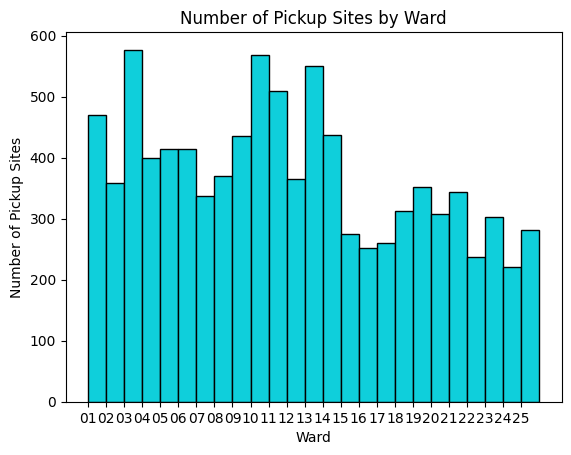

In [52]:
#Plot a histogram to display the number of pickup sites per ward
plt.hist(df['WARD'], bins=range(26), edgecolor='black', color= '#0fcfdb' )
plt.title("Number of Pickup Sites by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Pickup Sites")
plt.show()

